<a href="https://colab.research.google.com/github/DaniDelgon/Double_Pendulum/blob/main/StochasticPendulum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Métodos estocásticos
Vamos a aplicar procesos estocásticos a un péndulo doble, así los valores que podemos variar para los procesos estocásticos serán la posición inicial, la longitud y la masa del primer y el segundo péndulo. Empezaremos por variar la posición incial tanto del primer péndulom como del segundo.

In [ ]:
from numpy import *
from pylab import *

#Primero, importamos las funciones necesarias de nuestro anterior trabajo de ecuaciones diferenciales, así:

def integrador(func,metodo,xi,yi,xf,h):
  k=0
  X=[]  
  Y=[]
  X.append(xi)
  Y.append(yi)
  x=xi
  y=yi
  while x<xf:
    y=metodo(func,x,y,h)
    x=x+h
    X.append(x)
    Y.append(y)
  return array(X),array(Y)

def Rung(f,xi,yi,h):
  K1=f(xi,yi)
  K2=f(xi+0.5*h,yi+0.5*h*K1)
  K3=f(xi+0.5*h,yi+0.5*h*K2)
  K4=f(xi+h,yi+h*K3)
  yi1=yi+(h/6.)*(K1+2*K2+2*K3+K4)
  return yi1

def pendobl(x,y):
  g=9.8
  deriv=zeros(4)
  deriv[0]=y[1]
  deriv[1]=(cos(y[0]-y[2])*((g/l1)*sin(y[2])-(y[1]**(2))*sin(y[0]-y[2]))-(l2/l1)*(((m1/m2)+1)*(g/l2)*sin(y[0])+(y[3]**(2))*sin(y[0]-y[2])))/((m1/m2)+(sin(y[0]-y[2]))**2)
  deriv[2]=y[3]
  deriv[3]=(cos(y[0]-y[2])*(((m1/m2)+1)*(g/l2)*sin(y[0])+(y[3]**(2))*sin(y[0]-y[2]))-((m1/m2)+1)*(l1/l2)*((g/l1)*sin(y[2])-(y[1]**(2))*sin(y[0]-y[2])))/((m1/m2)+(sin(y[0]-y[2]))**(2))
  return deriv

#Y definimos una función para simplificar cuando vayamos a variar una variable, ya que tenemos unas cuantas (l1,l2,m1,m2,alfa1(t=0),alfa2(t=0))

def Stoch(integr,func,metodo,xi,yi,xf,h,n):
  global l1,l2,m1,m2                      #Ponemos este comando para obtener estas variables por fuera de la función.
  result1=zeros((n,int(abs(xf-xi)/h)+2))  #Definimos la matriz de ceros donde vamos a poner el ángulo del segundo péndulo
  result2=zeros((n,int(abs(xf-xi)/h)+2))  #Y en esta matriz ponemos la velocidad angular del segundo péndulo
  #Metemos en una matriz todas las variables que vamos a variar y comprobamos cuales de estas no vamos a variar en el caso actual, y las convertimos en una
  #matriz con elementos del mismo valor.
  l=array([l1,l2,m1,m2,yi[0],yi[2]])
  for k in range(0,len(l)):
    if type(l[k])!=ndarray:
      l[k]=linspace(l[k],l[k],n)
  #Y obtenemos el resultado para cada valor de la variable que vayamos a variar    
  for k in range(0,n):
    l1=l[0][k]
    l2=l[1][k]
    m1=l[2][k]
    m2=l[3][k]
    yi[0]=l[4][k]
    yi[2]=l[5][k]
    t,sol=integr(func,metodo,xi,yi,xf,h)
    result1[k,:]=sol[:,2]
    result2[k,:]=sol[:,3]
  #Obtenemos los percentiles y las medias tanto para el ángulo como para la velocidad angular y los ploteamos en gráficas diferentes.
  for i in range(0,n):
    plot(t,result1[i,:],'grey', alpha=0.5)
  med=mean(result1,axis=0)
  plot(t,med,'red',label='Media')
  p10=percentile(result1,10,axis=0)
  plot(t,p10,'green',label='Percentil 10%')
  p90=percentile(result1,90,axis=0)
  plot(t,p90,'blue',label='Percentil 90%')
  ylabel('Ángulo [rad]')
  xlabel('Tiempo [s]')
  grid()
  legend()
  show()
  for i in range(0,n):
    plot(t,result2[i,:],'grey', alpha=0.5)
  med=mean(result2,axis=0)
  plot(t,med,'red',label='Media')
  p10=percentile(result2,10,axis=0)
  plot(t,p10,'green',label='Percentil 10%')
  p90=percentile(result2,90,axis=0)
  plot(t,p90,'blue',label='Percentil 90%')
  ylabel('Velocidad angular [rad/s]')
  xlabel('Tiempo [s]')
  grid()
  legend()
  show()
  #return result1,result2

###Variación de l1
Primero, variamos el primer lado l1, así primero asignamos las variables iniciales necesarias:

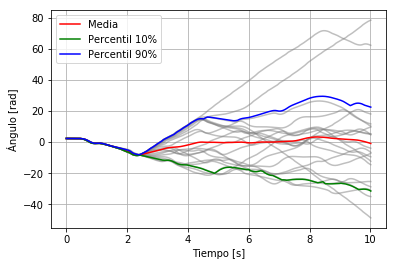

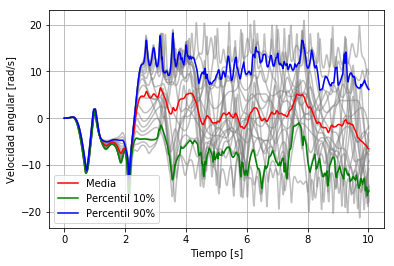

In [ ]:
n=20
l1=linspace(0.8,1,n)    #random.uniform(low=0.5, high=13.3, size=(50,))
l2=0.6
m1=1
m2=1
yi=array([3*pi/4,0,3*pi/4,0])

Stoch(integrador,pendobl,Rung,0,yi,10,0.01,n)

###Variación de l2
Ahora variamos el segundo lado l2, y como tenemos definida nuestra función Stoch, solo nos hace falta definir  l1 para que deje de ser un array, y definir l2 para que empiece a ser un array, y los demás valores está definidos anteriormente, así:

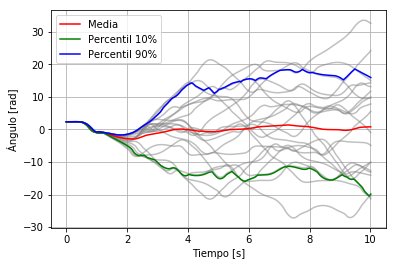

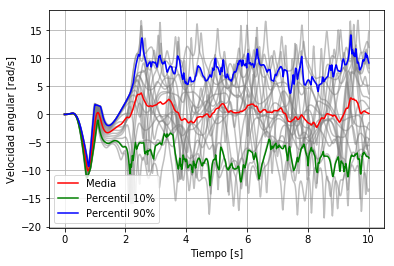

In [ ]:
l1=0.9
l2=linspace(0.6,1,n)

Stoch(integrador,pendobl,Rung,0,yi,10,0.01,n)

###Variación de m1

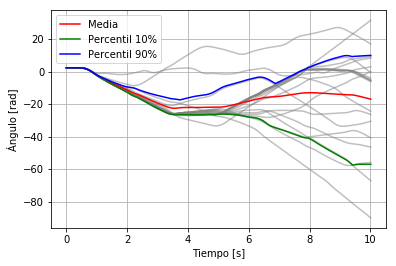

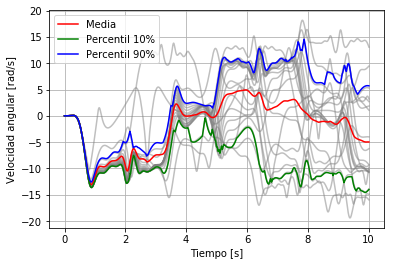

In [ ]:
l2=0.9
m1=linspace(1,100,n)

Stoch(integrador,pendobl,Rung,0,yi,10,0.01,n)

###Variación de m2

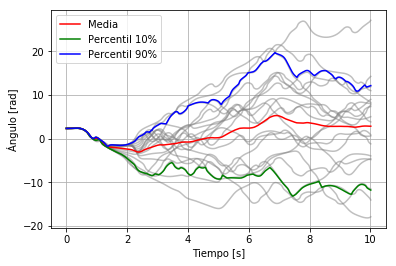

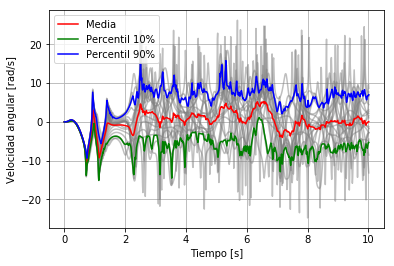

In [ ]:
m1=5
m2=linspace(8,50,n)

Stoch(integrador,pendobl,Rung,0,yi,10,0.01,n)

###Variación de $\theta _{1}( t= 0)$

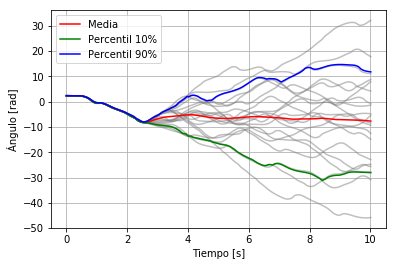

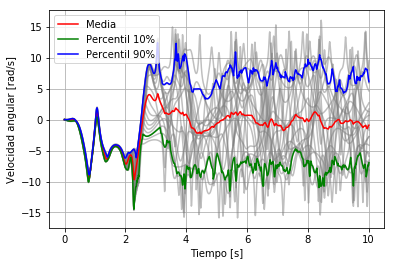

In [ ]:
m2=8
yi=array([linspace(3*pi/4,(3*pi/4)+0.1,n),0,3*pi/4,0])

Stoch(integrador,pendobl,Rung,0,yi,10,0.01,n)

###Variación de $\theta _{2}( t= 0)$

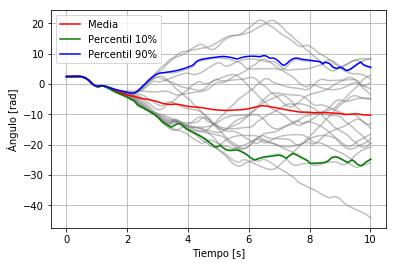

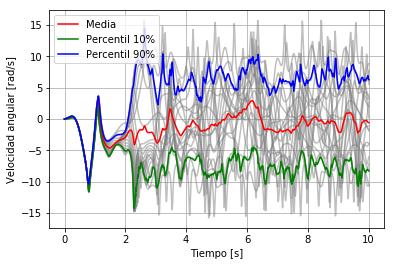

In [ ]:
yi=array([3*pi/4,0,linspace(3*pi/4,(3*pi/4)+0.1,n),0])

Stoch(integrador,pendobl,Rung,0,yi,10,0.01,n)